In [ ]:
#compare the CV values of czechowski et al 2005 (microarray) with only genes expressed in 80% or more of conditions/tissues and TAU values with no filtering based on presence in conditions/tissues.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [17]:
file_names = 'non-overlapping_includingbidirectional_all_genes_newannotation'
output_prefix = 'czechowski_CV_TAU'


In [18]:
#make directory for the plots to be exported to
dirName = f'../../data/output/{file_names}/genes/plots'
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " created") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory  ../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/plots  already exists


In [19]:
def all_prom_distribution(output_prefix,palette_colours,df, x_variable, x_label, df2=pd.DataFrame(),df1_label='', df2_label='', labels=False,
                          min_x_constitutive=False, max_x_constitutive=False,min_x_variable=False,max_x_variable=False, save=False):
    """function to return distribution plot of all promoters of variable of interest. 
    df1_label and df2 labels are the names of the respective gene type subset in the df"""
    #if only 1 dataframe provided then create just 1 plot
    #set colour palette
    sns.set_palette(palette_colours)
    if df2.empty:    
        dist_plot = df[x_variable]
        #create figure with no transparency
        dist_plot_fig = sns.distplot(dist_plot)
        plt.xlabel(x_label)
    #else if 2 dataframes provided plot them on the same axes
    else:
        dist_plot1 = df[x_variable]
        dist_plot2 = df2[x_variable]
        dist_plot_fig = sns.distplot(dist_plot1,hist=False, rug=True,label=df1_label)
        sns.distplot(dist_plot2,hist=False, rug=True,label=df2_label)
        #create legend
        plt.legend()
    if labels==True:
        #get axes
        ax = plt.axes()
        #constitutive annotation
        ax.annotate('top 100 constitutive range', xy=(max_x_constitutive, 0.2), xycoords='data', ha='left',
            xytext=(50, 100), textcoords='offset points',
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.4', 
                            color='black'))
        ax.annotate('', xy=(max_x_constitutive, 0.2),
            xytext=(min_x_constitutive, 0.2),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2','color':'blue'})
        #Variable annotation
        ax.annotate('top 100 variable range', xy=(max_x_variable, 0.2), xycoords='data', ha='right',
            xytext=(0, -20), textcoords='offset points')
        ax.annotate('', xy=(max_x_variable, 0.2),
            xytext=(min_x_variable, 0.2),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2','color':'orange' })
        

    #save to file
    if save == True:
        dist_plot_fig.get_figure().savefig(f'../../data/output/{file_names}/genes/plots/{output_prefix}_distribution.pdf', format='pdf')
    return dist_plot_fig

In [20]:
#location of CV files
czechowski_cv = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_constitutive_variable_random.txt'
czechowski_cv_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_allfilteredgenes.txt'
#location of TAU files
czechowski_tau = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_schmid_constitutive_tissuespecific_random.txt'
czechowski_tau_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_schmid_allfilteredgenes.txt'


In [21]:
#read in files to dfs
czechowski_cv_df = pd.read_table(czechowski_cv, sep='\t', header=None)
czechowski_tau_df = pd.read_table(czechowski_tau, sep='\t', header=None)
cols = ['AGI', 'gene_type']
czechowski_cv_df.columns = cols
czechowski_tau_df.columns = cols

In [22]:
#read in all genes
czechowski_cv_all_df = pd.read_table(czechowski_cv_all, sep='\t', header=0)
czechowski_tau_all_df = pd.read_csv(czechowski_tau_all, sep='\t',header=0)

In [23]:
czechowski_tau_all_df

,chr,start,stop,AGI,dot1,strand,source,type,dot2,attributes,tau
0,1,2630,3759,AT1G01010,.,+,araport11,promoter,.,ID=gene:AT1G01010;Name=NAC001;biotype=protein_...,0.1994
1,1,12940,14714,AT1G01030,.,-,araport11,promoter,.,ID=gene:AT1G01030;Name=NGA3;biotype=protein_co...,0.1603
2,1,37061,38443,AT1G01060,.,-,araport11,promoter,.,ID=gene:AT1G01060;Name=LHY;biotype=protein_cod...,0.0928
3,1,40877,42017,AT1G01070,.,-,araport11,promoter,.,ID=gene:AT1G01070;biotype=protein_coding;descr...,0.2367
4,1,46789,47233,AT1G01080,.,-,araport11,promoter,.,ID=gene:AT1G01080;biotype=protein_coding;descr...,0.0989
...,...,...,...,...,...,...,...,...,...,...,...
13895,5,26938498,26939341,AT5G67520,.,+,araport11,promoter,.,ID=gene:AT5G67520;Name=APK4;biotype=protein_co...,0.2467
13896,5,26949112,26950105,AT5G67550,.,-,araport11,promoter,.,ID=gene:AT5G67550;biotype=protein_coding;descr...,0.4216
13897,5,26949184,26950578,AT5G67560,.,+,araport11,promoter,.,ID=gene:AT5G67560;Name=ARL8B;biotype=protein_c...,0.0705
13898,5,26957073,26957914,AT5G67580,.,-,araport11,promoter,.,ID=gene:AT5G67580;Name=TRB2;biotype=protein_co...,0.0561


In [39]:
czechowski_cv_df[czechowski_cv_df.gene_type == 'constitutive']

,AGI,gene_type
0,AT4G33380,constitutive
1,AT2G28390,constitutive
2,AT1G71820,constitutive
3,AT1G48900,constitutive
4,AT3G32260,constitutive
...,...,...
95,AT4G14615,constitutive
96,AT2G39960,constitutive
97,AT1G50410,constitutive
98,AT1G54390,constitutive


In [55]:
filter1 = czechowski_cv_df[czechowski_cv_df.gene_type == 'constitutive'].AGI.isin(czechowski_tau_df[czechowski_tau_df.gene_type == 'constitutive'].AGI)

In [56]:
filter2 = czechowski_cv_df[czechowski_cv_df.gene_type == 'variable'].AGI.isin(czechowski_tau_df[czechowski_tau_df.gene_type == 'tissue_specific'].AGI)

In [59]:
filter3 = czechowski_cv_df[czechowski_cv_df.gene_type == 'control'].AGI.isin(czechowski_tau_df[czechowski_tau_df.gene_type == 'control'].AGI)

In [57]:
#how many constitutive genes in both cv and tau constitutive sets?
inboth = czechowski_cv_df[czechowski_cv_df.gene_type == 'constitutive'][filter1]
len(inboth[inboth.gene_type == 'constitutive'])

35

In [54]:
#how many variable genes in both mergner and czechowski constitutive sets?
inboth2 = czechowski_cv_df[czechowski_cv_df.gene_type == 'variable'][filter2]
len(inboth2[inboth2.gene_type == 'variable'])

1

In [60]:
#how many control genes in both mergner and czechowski constitutive sets?
inboth3 = czechowski_cv_df[czechowski_cv_df.gene_type == 'control'][filter3]
len(inboth3[inboth3.gene_type == 'control'])

1

<AxesSubplot:xlabel='Expression CV'>

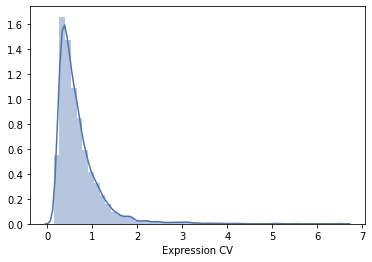

In [27]:
#all czechowski CV distribution plot
all_prom_distribution('cv_dist_plot_czechowski','deep',czechowski_cv_all_df,'expression_CV', 'Expression CV',save=True)

<AxesSubplot:xlabel='Tau'>

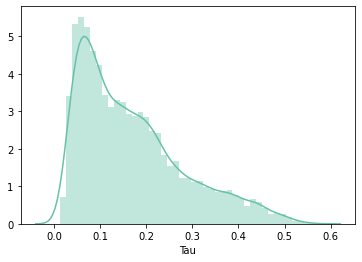

In [28]:
#all TAU distribution plot
all_prom_distribution('tau_dist_plot_czechowski','Set2',czechowski_tau_all_df,'tau', 'Tau',save=True)

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='expression_CV'>

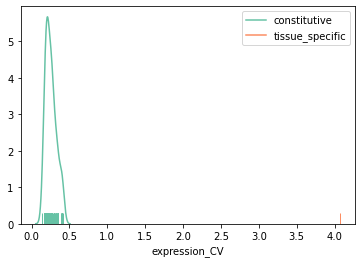

In [29]:
#plot CV from CV ranking for top tissue_specific and top constitutive genes from CV ranking'

#merge dfs
merged2 = pd.merge(czechowski_tau_df,czechowski_cv_all_df, on='AGI', how='left')
#ONLY ? GENES FROM TAU SET ARE IN THE CV SET
# constitutive genes from RNA-seq in microarray
# variable genes from RNA-seq in microarray
# control genes from RNA-seq in microarray
all_prom_distribution('cv_taucategories_dist_czechowski','Set2',merged2[merged2.gene_type == 'constitutive'],'expression_CV', 'Expression CV', merged2[merged2.gene_type == 'tissue_specific'], df1_label='constitutive',df2_label='tissue_specific',save=True)

In [124]:
#remove NaNs
not_nan = merged2[(merged2.expression_CV.notnull())]
#how many constitutive from TAU ranking in CV all genes
not_nan[not_nan.gene_type=='constitutive'].gene_type.count()

99

In [125]:
#how many tissue_specific from TAU ranking in CV all genes
not_nan[not_nan.gene_type=='tissue_specific'].gene_type.count()

1

In [126]:
#how many control from TAU ranking in CV all genes
not_nan[not_nan.gene_type=='control'].gene_type.count()

47

In [32]:
#plot TAU for top variable and top constitutive genes from CV ranking'
merged = pd.merge(czechowski_cv_df,czechowski_tau_all_df, on='AGI', how='left')

<AxesSubplot:xlabel='tau'>

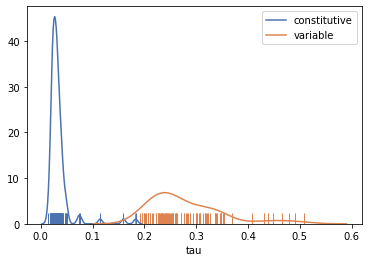

In [33]:
#plot the tau of the CV ranking variable and constitutive gene sets '

all_prom_distribution('tau_cvcategories_dist_czechowski','deep',merged[merged.gene_type == 'constitutive'],'tau', 'Tau', merged[merged.gene_type == 'variable'], df1_label='constitutive',df2_label='variable',save=True)
#Indeed constitutive genes set from the microarray have lower TAU than the variable gene set

<AxesSubplot:xlabel='expression_CV'>

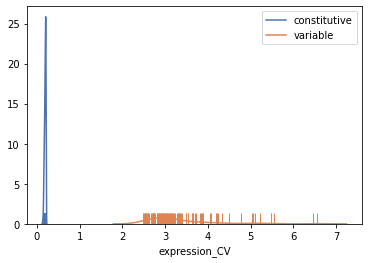

In [35]:
#czechovski CV distribution
#using CVs and gene categories from only the microarray, plot CVs of the constitutive and variable gene sets
merged_czechowski_cv =pd.merge(czechowski_cv_df,czechowski_cv_all_df, on='AGI', how='left')
all_prom_distribution('cv_categories_czechowski','deep',merged_czechowski_cv[merged_czechowski_cv.gene_type == 'constitutive'],'expression_CV', 'Expression CV',merged_czechowski_cv[merged_czechowski_cv.gene_type == 'variable'],df1_label='constitutive',df2_label='variable',save=True)

<AxesSubplot:xlabel='tau'>

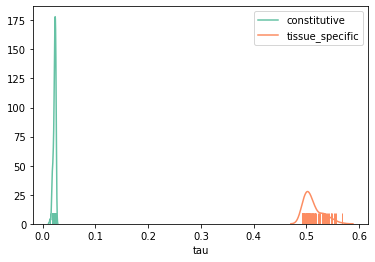

In [34]:
#TAU distribution
#using tau and gene categories from only the tau ranking data, plot tau of the constitutive and tissue_specific gene sets
merged_czechowski_tau =pd.merge(czechowski_tau_df,czechowski_tau_all_df, on='AGI', how='left')
all_prom_distribution('tau_categories_czechowski','Set2',merged_czechowski_tau[merged_czechowski_tau.gene_type == 'constitutive'],'tau', 'Tau',merged_czechowski_tau[merged_czechowski_tau.gene_type == 'tissue_specific'],df1_label='constitutive',df2_label='tissue_specific',save=True)
#all variable genes have a CV of 5.385165